<h2>Read and play the signals</h2>

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import scipy
import librosa
import librosa.display
from IPython.core.display import display
import IPython.display as ipd
from data import create_spec
import os
import torch
from torch import nn
from args import config
args= config()

In [ ]:
sig_noisy_path= "data/train_small/noisy/signal/Jules_Verne_-_L_ile_mysterieuse_Partie1_Chap01_0_.wav"
sig_path= "data/train_small/original/signal/Jules_Verne_-_L_ile_mysterieuse_Partie1_Chap01_0_.wav"

fs_noisy, sig_noisy = scipy.io.wavfile.read(sig_noisy_path)
fs, sig = scipy.io.wavfile.read(sig_path)

print("noisy singnal:")
display(ipd.Audio(data= sig_noisy, rate= fs))
print("original signal:")
display(ipd.Audio(data= sig, rate=fs))

noisy singnal:


original signal:


In [ ]:
print('teh shape of the original signal is: {}'.format(sig.shape))
print(" the sampling frequency is: {}".format(fs))


teh shape of the original signal is: (80000,)
 the sampling frequency is: 8000


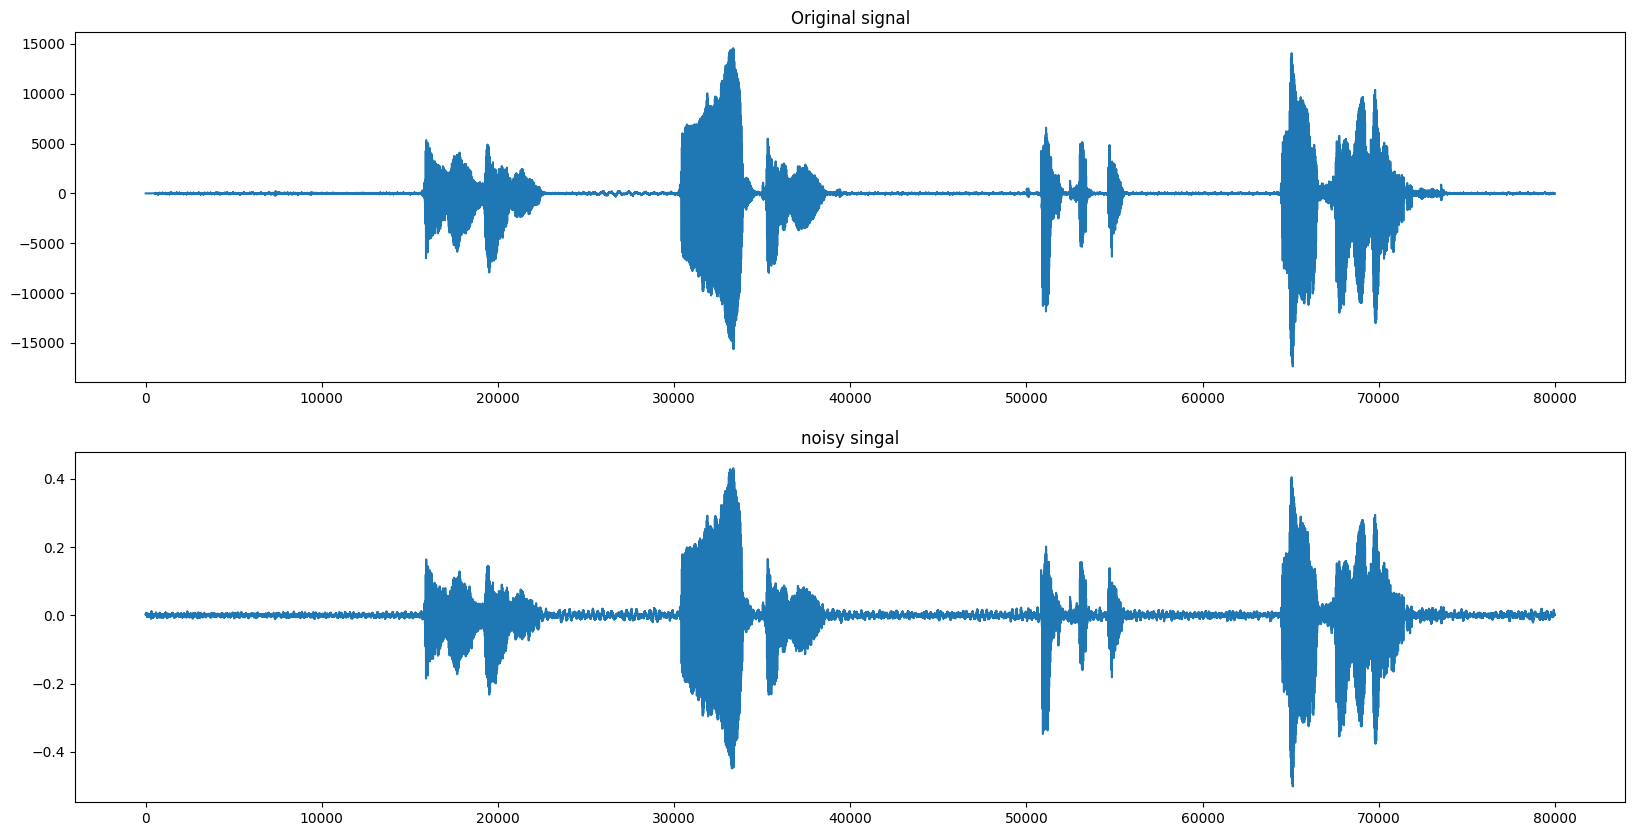

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(sig, label='orginal signal')
plt.title('Original signal')

plt.subplot(2,1,2)
plt.plot(sig_noisy)
plt.title("noisy singal")
plt.show()

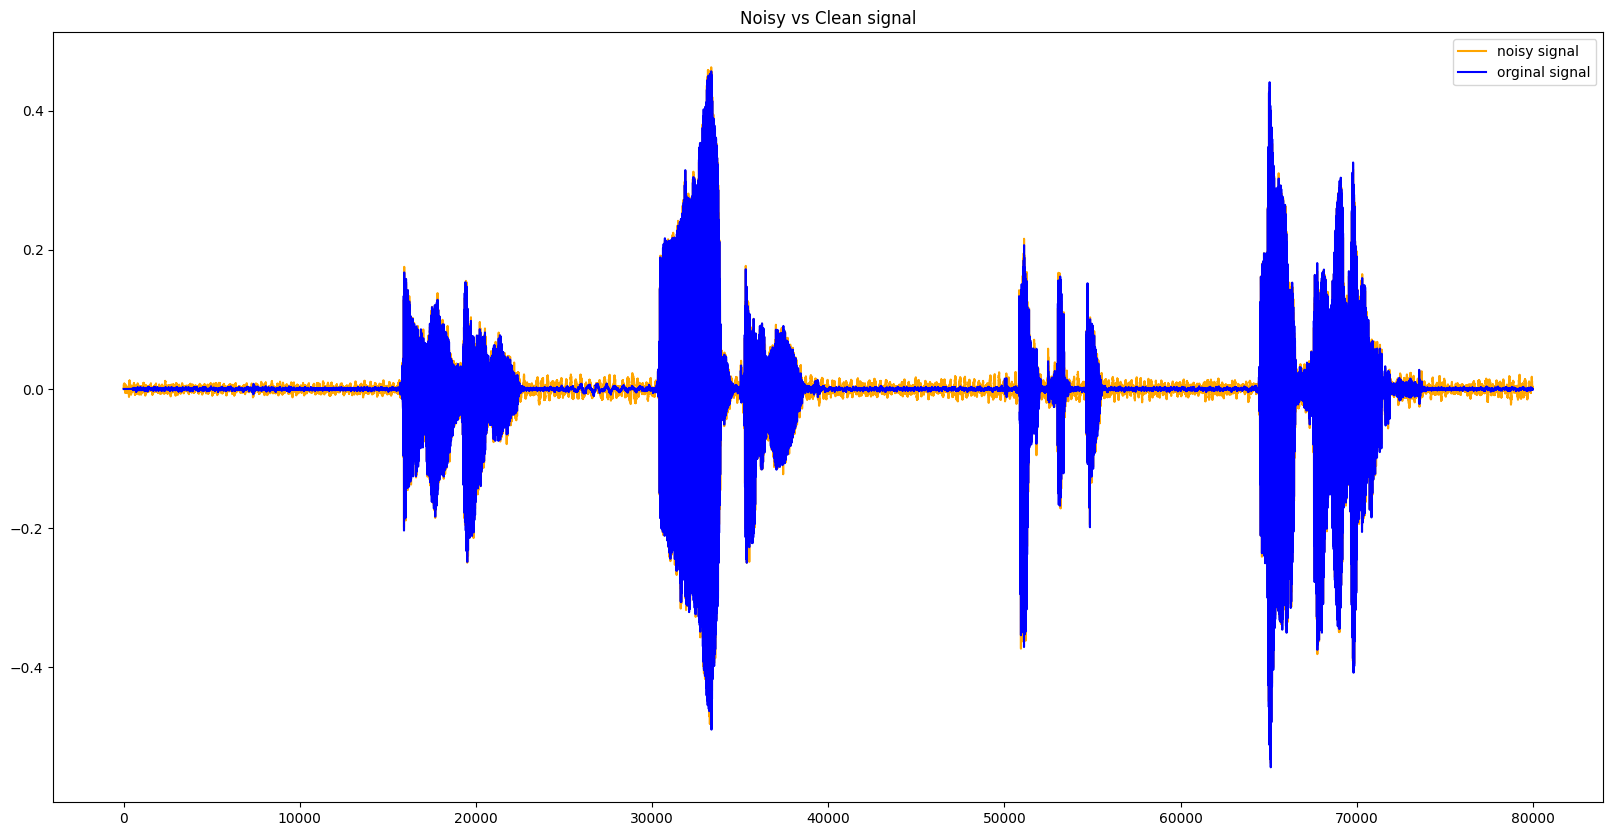

In [ ]:
plt.figure(figsize=(20,10))
plt.plot((sig_noisy- np.mean(sig_noisy))/(np.max(sig_noisy)- np.min(sig_noisy)), label='noisy signal', color='Orange')
plt.plot((sig- np.mean(sig))/(np.max(sig)- np.min(sig)), label='orginal signal', color='Blue')
plt.legend()
plt.title('Noisy vs Clean signal')
plt.show()

<h2>Get the spectrograms and visualze:

Text(0, 0.5, 'Frequency')

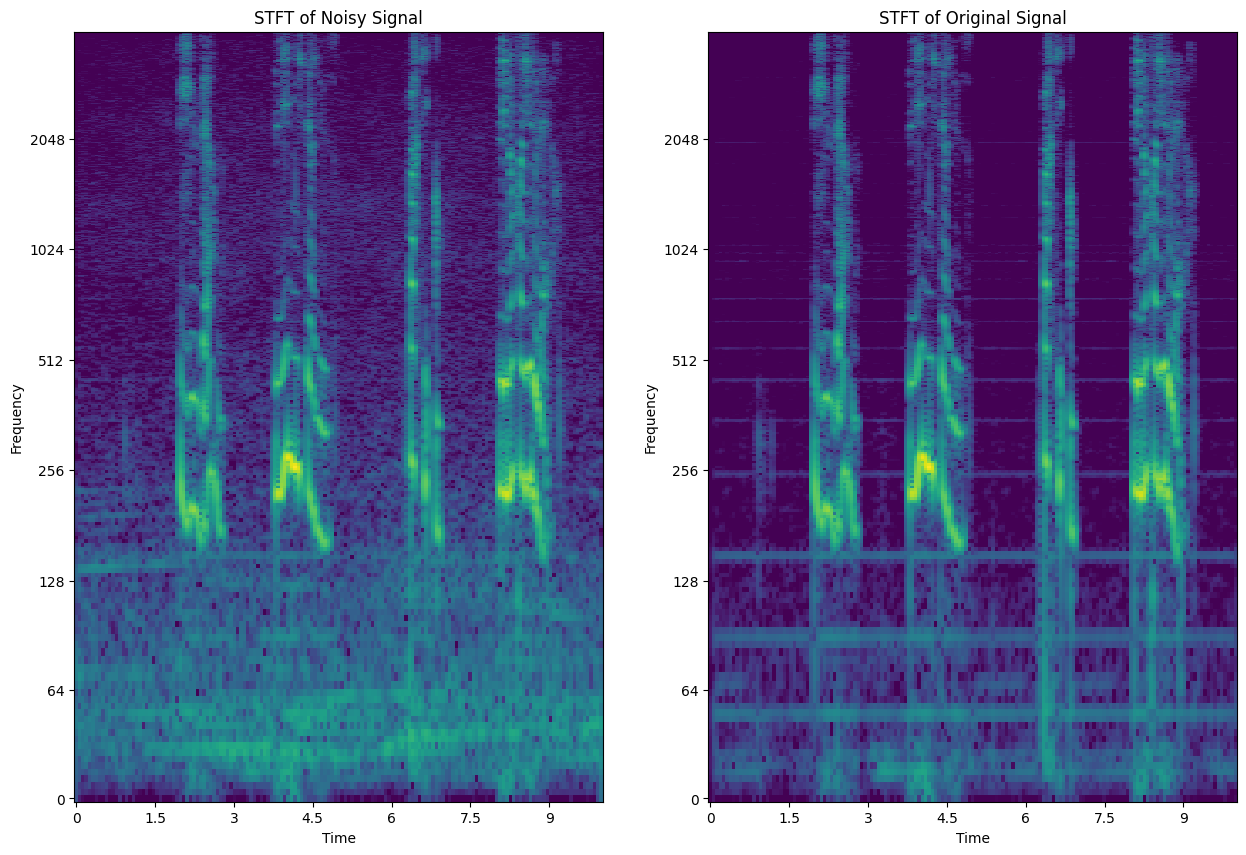

In [ ]:
#get stft
stft_noisy= librosa.stft(sig_noisy.astype(float))
stft_origin= librosa.stft(sig.astype(float))

# Displaying the results
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

librosa.display.specshow(librosa.amplitude_to_db(abs(stft_noisy)),sr=fs_noisy, x_axis='time', y_axis='log', ax=ax[0], cmap='viridis')
ax[0].set_title('STFT of Noisy Signal')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Frequency')

librosa.display.specshow(librosa.amplitude_to_db(abs(stft_origin)),sr=fs, x_axis='time', y_axis='log', ax=ax[1], cmap='viridis')
ax[1].set_title('STFT of Original Signal')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Frequency')

We can clearly differentiate between some features of the original signal and noisy signal

<class 'numpy.ndarray'>
(257, 313)


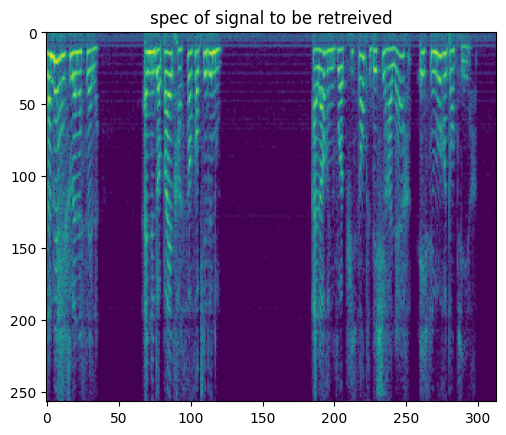

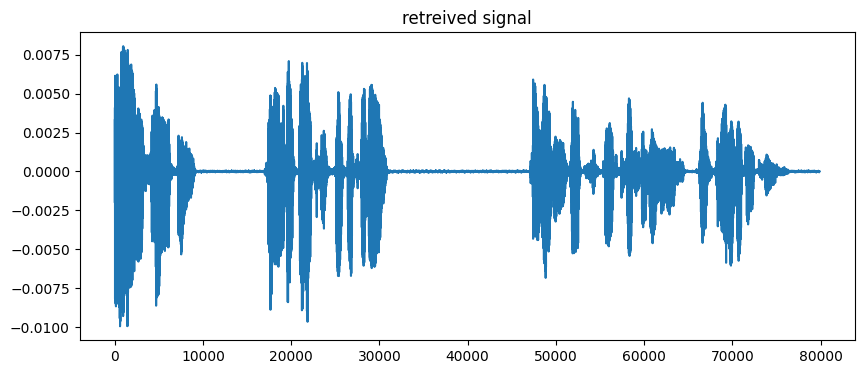

In [ ]:
#after creating spec and phase retreive the audio signal
from data import retreive_sig
from PIL import Image
path_spec='/content/data/data/train/original/spec/Jules_Verne_-_L_ile_mysterieuse_Partie1_Chap01_4_.npy'
path_phase= '/content/data/data/train/original/phase/Jules_Verne_-_L_ile_mysterieuse_Partie1_Chap01_4_.npy'
spec= np.load(path_spec)
plt.imshow(spec)
plt.title("spec of signal to be retreived")
print(type(spec))

phase= np.load(path_phase)
# plt.imshow(spec)
print(spec.shape)
n_fft= 512
hop_length_fft= 256
fs= 8000
audio_retrieved= retreive_sig(spec, phase, n_fft, hop_length_fft)
plt.figure(figsize=(10,4))
plt.plot(audio_retrieved)
plt.title('retreived signal')
plt.show()

display(ipd.Audio(data= audio_retrieved, rate= fs))

<h2>Train baseline model</h2>

In [ ]:
#### create dataset class and get data
#######################################
from torchvision import transforms
from data import MyDataset
from train_unet import get_pesq, get_stoi
from torch.utils.data import DataLoader, random_split


path= '/data/train/'

transform= transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

Loading the data...
Device: cuda

 start training


  0%|          | 0/50 [00:00<?, ?it/s]

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_0.pth


  2%|▏         | 1/50 [04:16<3:29:31, 256.57s/it]

Epoch 1, Train Loss: 4066.6253, Validation Loss: 3531.9172, Average PESQ: 1.2700, Average STOI: 0.4758


  4%|▍         | 2/50 [08:02<3:10:51, 238.57s/it]

Epoch 2, Train Loss: 6281.9951, Validation Loss: 224.6288, Average PESQ: 1.1893, Average STOI: 0.4611
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_2.pth


  6%|▌         | 3/50 [11:49<3:02:41, 233.22s/it]

Epoch 3, Train Loss: 183.9810, Validation Loss: 71.6804, Average PESQ: 2.0897, Average STOI: 0.7956
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_3.pth


  8%|▊         | 4/50 [15:37<2:57:17, 231.26s/it]

Epoch 4, Train Loss: 67.0537, Validation Loss: 54.4080, Average PESQ: 2.3265, Average STOI: 0.8497
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_4.pth


 10%|█         | 5/50 [19:26<2:52:39, 230.22s/it]

Epoch 5, Train Loss: 58.8942, Validation Loss: 50.2797, Average PESQ: 2.3919, Average STOI: 0.8510
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_5.pth


 12%|█▏        | 6/50 [23:15<2:48:31, 229.80s/it]

Epoch 6, Train Loss: 55.0445, Validation Loss: 58.6500, Average PESQ: 2.4988, Average STOI: 0.8537
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_6.pth


 14%|█▍        | 7/50 [27:03<2:44:29, 229.53s/it]

Epoch 7, Train Loss: 50.6150, Validation Loss: 42.7905, Average PESQ: 2.5769, Average STOI: 0.8740
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_7.pth


 16%|█▌        | 8/50 [30:52<2:40:21, 229.09s/it]

Epoch 8, Train Loss: 46.9878, Validation Loss: 42.5202, Average PESQ: 2.7292, Average STOI: 0.8733
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_8.pth


 18%|█▊        | 9/50 [34:40<2:36:27, 228.96s/it]

Epoch 9, Train Loss: 45.4075, Validation Loss: 51.4671, Average PESQ: 2.3265, Average STOI: 0.8790
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_9.pth


 20%|██        | 10/50 [38:28<2:32:17, 228.43s/it]

Epoch 10, Train Loss: 44.0559, Validation Loss: 39.9601, Average PESQ: 2.6960, Average STOI: 0.8742
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_10.pth


 22%|██▏       | 11/50 [42:15<2:28:22, 228.27s/it]

Epoch 11, Train Loss: 42.0239, Validation Loss: 37.8914, Average PESQ: 2.6830, Average STOI: 0.8833
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_11.pth


 24%|██▍       | 12/50 [46:03<2:24:23, 227.97s/it]

Epoch 12, Train Loss: 41.1661, Validation Loss: 37.3318, Average PESQ: 2.6516, Average STOI: 0.8892
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_12.pth


 26%|██▌       | 13/50 [49:51<2:20:36, 228.01s/it]

Epoch 13, Train Loss: 40.2147, Validation Loss: 36.3486, Average PESQ: 2.6849, Average STOI: 0.8849
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_13.pth


 28%|██▊       | 14/50 [53:39<2:16:54, 228.18s/it]

Epoch 14, Train Loss: 39.1446, Validation Loss: 36.4040, Average PESQ: 2.6557, Average STOI: 0.8811
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_14.pth


 30%|███       | 15/50 [57:30<2:13:29, 228.83s/it]

Epoch 15, Train Loss: 38.2585, Validation Loss: 46.3743, Average PESQ: 2.6241, Average STOI: 0.8846
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_15.pth


 32%|███▏      | 16/50 [1:01:21<2:10:05, 229.56s/it]

Epoch 16, Train Loss: 37.5200, Validation Loss: 35.2926, Average PESQ: 2.6804, Average STOI: 0.8850
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_16.pth


 34%|███▍      | 17/50 [1:05:11<2:06:23, 229.80s/it]

Epoch 17, Train Loss: 37.0378, Validation Loss: 34.6846, Average PESQ: 2.6724, Average STOI: 0.8893
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_17.pth


 36%|███▌      | 18/50 [1:09:01<2:02:30, 229.70s/it]

Epoch 18, Train Loss: 36.4863, Validation Loss: 34.0332, Average PESQ: 2.7105, Average STOI: 0.8879
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_18.pth


 38%|███▊      | 19/50 [1:12:50<1:58:35, 229.54s/it]

Epoch 19, Train Loss: 35.6607, Validation Loss: 35.9176, Average PESQ: 2.7232, Average STOI: 0.8834
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_19.pth


 40%|████      | 20/50 [1:16:39<1:54:38, 229.28s/it]

Epoch 20, Train Loss: 35.4891, Validation Loss: 36.4804, Average PESQ: 2.6306, Average STOI: 0.8829
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_20.pth


 42%|████▏     | 21/50 [1:20:28<1:50:45, 229.14s/it]

Epoch 21, Train Loss: 34.9879, Validation Loss: 33.9854, Average PESQ: 2.6493, Average STOI: 0.8879
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_21.pth


 44%|████▍     | 22/50 [1:24:16<1:46:50, 228.96s/it]

Epoch 22, Train Loss: 34.5544, Validation Loss: 33.6292, Average PESQ: 2.7312, Average STOI: 0.8869
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_22.pth


 46%|████▌     | 23/50 [1:28:04<1:42:50, 228.54s/it]

Epoch 23, Train Loss: 34.2627, Validation Loss: 33.2366, Average PESQ: 2.7159, Average STOI: 0.8906
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_23.pth


 48%|████▊     | 24/50 [1:31:50<1:38:45, 227.89s/it]

Epoch 24, Train Loss: 34.0549, Validation Loss: 33.3135, Average PESQ: 2.7228, Average STOI: 0.8926
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_24.pth


 50%|█████     | 25/50 [1:35:39<1:35:08, 228.33s/it]

Epoch 25, Train Loss: 33.5734, Validation Loss: 33.1719, Average PESQ: 2.7322, Average STOI: 0.8904
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_25.pth


 52%|█████▏    | 26/50 [1:39:30<1:31:34, 228.95s/it]

Epoch 26, Train Loss: 33.4476, Validation Loss: 32.9106, Average PESQ: 2.6788, Average STOI: 0.8895
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_26.pth


 54%|█████▍    | 27/50 [1:43:22<1:28:08, 229.92s/it]

Epoch 27, Train Loss: 33.1359, Validation Loss: 33.3917, Average PESQ: 2.6978, Average STOI: 0.8865
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_27.pth


 56%|█████▌    | 28/50 [1:47:14<1:24:30, 230.50s/it]

Epoch 28, Train Loss: 33.0595, Validation Loss: 32.6164, Average PESQ: 2.7060, Average STOI: 0.8913
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_28.pth


 58%|█████▊    | 29/50 [1:51:04<1:20:41, 230.54s/it]

Epoch 29, Train Loss: 32.8293, Validation Loss: 32.9117, Average PESQ: 2.7207, Average STOI: 0.8889
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_29.pth


 60%|██████    | 30/50 [1:54:55<1:16:52, 230.64s/it]

Epoch 30, Train Loss: 32.6892, Validation Loss: 33.2748, Average PESQ: 2.7161, Average STOI: 0.8882
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_30.pth


 62%|██████▏   | 31/50 [1:58:45<1:12:54, 230.22s/it]

Epoch 31, Train Loss: 32.4730, Validation Loss: 32.6101, Average PESQ: 2.6924, Average STOI: 0.8891
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_31.pth


 64%|██████▍   | 32/50 [2:02:33<1:08:54, 229.70s/it]

Epoch 32, Train Loss: 32.3328, Validation Loss: 32.4992, Average PESQ: 2.7275, Average STOI: 0.8912
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_32.pth


 66%|██████▌   | 33/50 [2:06:21<1:04:57, 229.28s/it]

Epoch 33, Train Loss: 32.2750, Validation Loss: 33.0183, Average PESQ: 2.7322, Average STOI: 0.8900
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_33.pth


 68%|██████▊   | 34/50 [2:10:09<1:01:00, 228.79s/it]

Epoch 34, Train Loss: 32.0819, Validation Loss: 32.3095, Average PESQ: 2.7027, Average STOI: 0.8900
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_34.pth


 70%|███████   | 35/50 [2:13:56<57:02, 228.16s/it]  

Epoch 35, Train Loss: 32.0384, Validation Loss: 32.2171, Average PESQ: 2.7127, Average STOI: 0.8910
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_35.pth


 72%|███████▏  | 36/50 [2:17:43<53:10, 227.92s/it]

Epoch 36, Train Loss: 31.9818, Validation Loss: 32.3998, Average PESQ: 2.7060, Average STOI: 0.8888
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_36.pth


 74%|███████▍  | 37/50 [2:21:32<49:28, 228.34s/it]

Epoch 37, Train Loss: 31.7913, Validation Loss: 32.6927, Average PESQ: 2.6868, Average STOI: 0.8907
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_37.pth


 76%|███████▌  | 38/50 [2:25:22<45:44, 228.68s/it]

Epoch 38, Train Loss: 31.7413, Validation Loss: 32.2522, Average PESQ: 2.7188, Average STOI: 0.8896
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_38.pth


 78%|███████▊  | 39/50 [2:29:11<41:57, 228.86s/it]

Epoch 39, Train Loss: 31.6526, Validation Loss: 32.2501, Average PESQ: 2.7082, Average STOI: 0.8918
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_39.pth


 80%|████████  | 40/50 [2:33:00<38:07, 228.73s/it]

Epoch 40, Train Loss: 31.6173, Validation Loss: 32.3386, Average PESQ: 2.7128, Average STOI: 0.8915
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_40.pth


 82%|████████▏ | 41/50 [2:36:49<34:20, 228.90s/it]

Epoch 41, Train Loss: 31.5612, Validation Loss: 32.2227, Average PESQ: 2.6986, Average STOI: 0.8909
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_41.pth


 84%|████████▍ | 42/50 [2:40:37<30:30, 228.81s/it]

Epoch 42, Train Loss: 31.4684, Validation Loss: 32.3371, Average PESQ: 2.7052, Average STOI: 0.8911
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_42.pth


 86%|████████▌ | 43/50 [2:44:27<26:42, 228.95s/it]

Epoch 43, Train Loss: 31.4529, Validation Loss: 32.1293, Average PESQ: 2.7175, Average STOI: 0.8901
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_43.pth


 88%|████████▊ | 44/50 [2:48:16<22:53, 228.97s/it]

Epoch 44, Train Loss: 31.3845, Validation Loss: 32.1505, Average PESQ: 2.7078, Average STOI: 0.8912
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_44.pth


 90%|█████████ | 45/50 [2:52:05<19:05, 229.00s/it]

Epoch 45, Train Loss: 31.3666, Validation Loss: 32.0935, Average PESQ: 2.7133, Average STOI: 0.8917
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_45.pth


 92%|█████████▏| 46/50 [2:55:53<15:14, 228.74s/it]

Epoch 46, Train Loss: 31.3368, Validation Loss: 32.2384, Average PESQ: 2.7192, Average STOI: 0.8896
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_46.pth


 94%|█████████▍| 47/50 [2:59:42<11:26, 228.75s/it]

Epoch 47, Train Loss: 31.2843, Validation Loss: 32.0990, Average PESQ: 2.7059, Average STOI: 0.8912
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_47.pth


 96%|█████████▌| 48/50 [3:03:30<07:37, 228.64s/it]

Epoch 48, Train Loss: 31.2615, Validation Loss: 32.0728, Average PESQ: 2.7137, Average STOI: 0.8910
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_48.pth


 98%|█████████▊| 49/50 [3:07:18<03:48, 228.30s/it]

Epoch 49, Train Loss: 31.2259, Validation Loss: 32.1064, Average PESQ: 2.7136, Average STOI: 0.8905
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints/checkpoint_ep_49.pth


100%|██████████| 50/50 [3:11:04<00:00, 229.29s/it]

Epoch 50, Train Loss: 31.2019, Validation Loss: 32.0928, Average PESQ: 2.7074, Average STOI: 0.8904


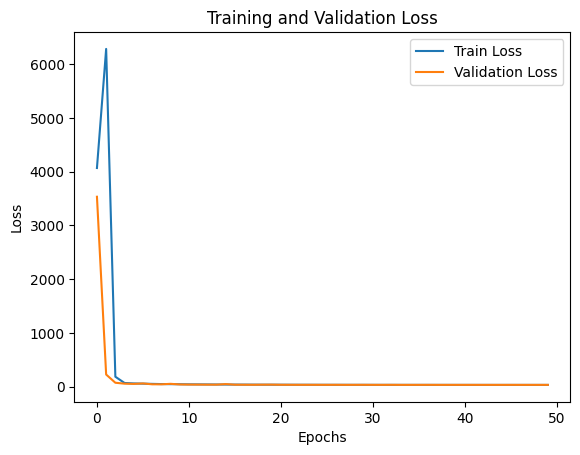

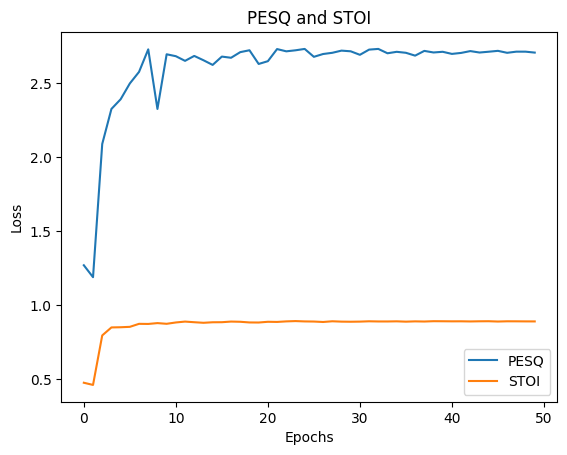

In [ ]:
#bluid train loop
from torch import nn
from train_unet import train
from model import My_unet
model= My_unet(in_channels=1, out_channels=1)

nepochs= 50
batch_size= 1
train_losses, val_losses, val_pesq_scores, val_stoi_scores= train(model, data_path='/data/train/', batch_size= batch_size, n_epochs= nepochs, transform=transform, save_dir='/content/drive/MyDrive/Dlts_project/checkpoints')

# Plot training and validation losses
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
plt.plot(val_pesq_scores, label='PESQ')
plt.plot(val_stoi_scores, label='STOI')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('PESQ and STOI')
plt.legend()
plt.show()



In [ ]:
# test the model:
from torch import nn
from test_unet import test
from model import My_unet

model= My_unet(in_channels=1, out_channels=1)

nepochs= 5
batch_size= 1
average_test_loss, average_snr_score,average_pesq_score, average_stoi_score= test(model, data_path='data/data/test/',checkpoint_path='/checkpoints_square/checkpoint_ep_49.pth', batch_size= batch_size, transform=transform, save_dir='/content/drive/MyDrive/Dlts_project/results_square')

Loading the data...
Device: cuda


  0%|          | 0/782 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
  0%|          | 1/782 [00:01<24:47,  1.90s/it]/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCro

Test Loss: 32.3043, Average SNR: 3.8760, Average PESQ: 2.7119, Average STOI: 0.8890
saved result dict !


original signal


noisy signal


retreived signal


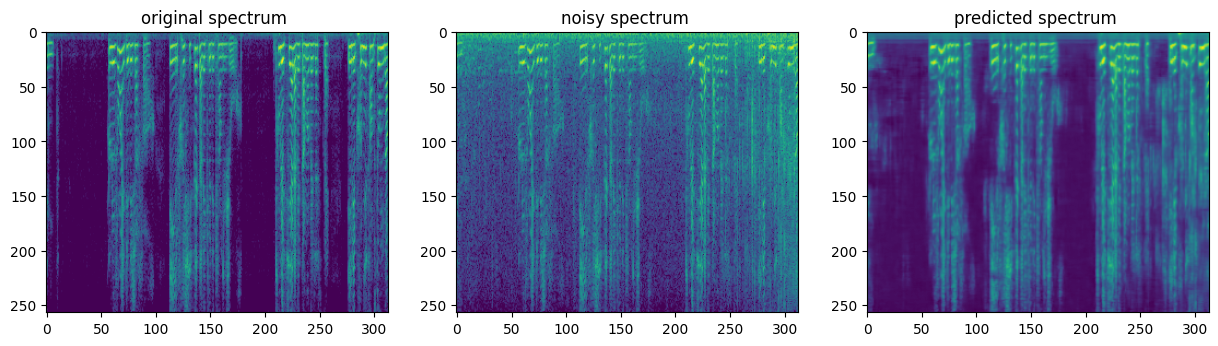

In [ ]:
#write a fucntion to retreive the results a compare the audios
import pickle
from data import retreive_sig
result_dict_path= '/results/result_dict.pickle'
data_path='/data/test/'

def read_results(result_dict_path, data_path):
  with open(result_dict_path, 'rb') as f:
    result_dict= pickle.load(f)

  file_names= result_dict['file_name']
  predicted_spec= result_dict['predicted_spec']
  noisy_phase= result_dict['noisy_phase']
  idx= np.random.randint(0, len(file_names))
  original_spec= np.load(os.path.join(data_path, 'original', 'spec',file_names[idx][0]+'.npy'))
  noisy_spec= np.load(os.path.join(data_path, 'noisy', 'spec', file_names[idx][0]+'.npy'))
  predicted_spec= predicted_spec[idx].squeeze(axis=0)[0].cpu().numpy()
  plt.figure(figsize=(15,5))
  plt.subplot(1,3,1)
  plt.imshow(original_spec)
  plt.title("original spectrum ")

  plt.subplot(1,3,2)
  plt.imshow(noisy_spec)
  plt.title("noisy spectrum ")

  plt.subplot(1,3,3)
  plt.imshow(predicted_spec)
  plt.title("predicted spectrum ")

  predicted_signal= retreive_sig(predicted_spec, noisy_phase[idx].cpu().numpy(), args.n_fft, args.hop_length_fft)

  original_signal =scipy.io.wavfile.read(os.path.join(data_path, 'original', 'signal', file_names[idx][0]+'.wav'))
  noisy_signal =scipy.io.wavfile.read(os.path.join(data_path, 'noisy', 'signal', file_names[idx][0]+'.wav'))

  print('original signal')
  display(ipd.Audio(data= original_signal[1], rate= args.fs))
  print('noisy signal')
  display(ipd.Audio(data= noisy_signal[1], rate= args.fs))
  print('retreived signal')
  display(ipd.Audio(data=predicted_signal, rate= args.fs))


read_results(result_dict_path= result_dict_path, data_path= data_path)

## Train the secod Unet
Now, we see that the although spectrograms are images, but the features

Loading the data...
Device: cuda

 start training


  0%|          | 0/50 [00:00<?, ?it/s]

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_0.pth


  2%|▏         | 1/50 [15:28<12:38:00, 928.18s/it]

Epoch 1, Train Loss: 942.4481, Validation Loss: 67.9359, Average PESQ: 2.2821, Average STOI: 0.8271
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_1.pth


  4%|▍         | 2/50 [30:53<12:20:58, 926.23s/it]

Epoch 2, Train Loss: 67.1951, Validation Loss: 74.1777, Average PESQ: 2.4941, Average STOI: 0.8415
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_2.pth


  6%|▌         | 3/50 [46:17<12:04:49, 925.30s/it]

Epoch 3, Train Loss: 61.6836, Validation Loss: 77.7501, Average PESQ: 2.3969, Average STOI: 0.8646
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_3.pth


  8%|▊         | 4/50 [1:01:39<11:48:33, 924.20s/it]

Epoch 4, Train Loss: 60.0048, Validation Loss: 56.1267, Average PESQ: 2.4051, Average STOI: 0.8584
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_4.pth


 10%|█         | 5/50 [1:17:01<11:32:33, 923.40s/it]

Epoch 5, Train Loss: 57.5109, Validation Loss: 54.1264, Average PESQ: 2.6137, Average STOI: 0.8604
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_5.pth


 12%|█▏        | 6/50 [1:32:26<11:17:24, 923.73s/it]

Epoch 6, Train Loss: 55.7221, Validation Loss: 57.5656, Average PESQ: 2.5057, Average STOI: 0.8582
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_6.pth


 14%|█▍        | 7/50 [1:47:48<11:01:43, 923.34s/it]

Epoch 7, Train Loss: 54.5392, Validation Loss: 49.8462, Average PESQ: 2.5828, Average STOI: 0.8593
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_7.pth


 16%|█▌        | 8/50 [2:03:11<10:46:08, 923.05s/it]

Epoch 8, Train Loss: 53.4155, Validation Loss: 49.2341, Average PESQ: 2.6126, Average STOI: 0.8682
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_8.pth


 18%|█▊        | 9/50 [2:18:31<10:30:11, 922.22s/it]

Epoch 9, Train Loss: 52.7290, Validation Loss: 54.6312, Average PESQ: 2.5669, Average STOI: 0.8598
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_9.pth


 20%|██        | 10/50 [2:33:49<10:14:00, 921.01s/it]

Epoch 10, Train Loss: 51.4621, Validation Loss: 50.7515, Average PESQ: 2.5647, Average STOI: 0.8639
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_10.pth


 22%|██▏       | 11/50 [2:49:07<9:58:05, 920.14s/it] 

Epoch 11, Train Loss: 50.9153, Validation Loss: 51.9245, Average PESQ: 2.5800, Average STOI: 0.8671
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_11.pth


 24%|██▍       | 12/50 [3:04:26<9:42:29, 919.74s/it]

Epoch 12, Train Loss: 49.9669, Validation Loss: 53.0891, Average PESQ: 2.5987, Average STOI: 0.8745
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_12.pth


 26%|██▌       | 13/50 [3:19:45<9:27:04, 919.57s/it]

Epoch 13, Train Loss: 49.5848, Validation Loss: 52.2379, Average PESQ: 2.5294, Average STOI: 0.8748
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_13.pth


 28%|██▊       | 14/50 [3:35:06<9:11:58, 919.95s/it]

Epoch 14, Train Loss: 49.4041, Validation Loss: 51.0836, Average PESQ: 2.5987, Average STOI: 0.8737
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_14.pth


 30%|███       | 15/50 [3:50:28<8:56:53, 920.39s/it]

Epoch 15, Train Loss: 48.1024, Validation Loss: 51.4184, Average PESQ: 2.6335, Average STOI: 0.8734
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_15.pth


 32%|███▏      | 16/50 [4:05:49<8:41:47, 920.81s/it]

Epoch 16, Train Loss: 47.5100, Validation Loss: 53.4725, Average PESQ: 2.5997, Average STOI: 0.8746
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_16.pth


 34%|███▍      | 17/50 [4:21:08<8:26:07, 920.21s/it]

Epoch 17, Train Loss: 47.4769, Validation Loss: 46.9314, Average PESQ: 2.6654, Average STOI: 0.8749
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_17.pth


 36%|███▌      | 18/50 [4:36:26<8:10:24, 919.53s/it]

Epoch 18, Train Loss: 46.9976, Validation Loss: 45.8061, Average PESQ: 2.6488, Average STOI: 0.8749
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_18.pth


 38%|███▊      | 19/50 [4:51:44<7:54:51, 919.09s/it]

Epoch 19, Train Loss: 46.7218, Validation Loss: 47.8976, Average PESQ: 2.6345, Average STOI: 0.8697
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_19.pth


 40%|████      | 20/50 [5:07:02<7:39:23, 918.79s/it]

Epoch 20, Train Loss: 46.2084, Validation Loss: 46.3556, Average PESQ: 2.6327, Average STOI: 0.8717
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_20.pth


 42%|████▏     | 21/50 [5:22:19<7:23:48, 918.22s/it]

Epoch 21, Train Loss: 46.0198, Validation Loss: 45.3418, Average PESQ: 2.6370, Average STOI: 0.8748
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_21.pth


 44%|████▍     | 22/50 [5:37:35<7:08:12, 917.60s/it]

Epoch 22, Train Loss: 45.4970, Validation Loss: 45.1689, Average PESQ: 2.5687, Average STOI: 0.8773
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_22.pth


 46%|████▌     | 23/50 [5:52:56<6:53:21, 918.57s/it]

Epoch 23, Train Loss: 45.3756, Validation Loss: 46.3590, Average PESQ: 2.6033, Average STOI: 0.8700
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_23.pth


 48%|████▊     | 24/50 [6:08:12<6:37:44, 917.85s/it]

Epoch 24, Train Loss: 45.2691, Validation Loss: 44.7805, Average PESQ: 2.6388, Average STOI: 0.8751
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_24.pth


 50%|█████     | 25/50 [6:23:28<6:22:10, 917.22s/it]

Epoch 25, Train Loss: 45.1834, Validation Loss: 44.8433, Average PESQ: 2.6957, Average STOI: 0.8764
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_25.pth


 52%|█████▏    | 26/50 [6:38:44<6:06:42, 916.76s/it]

Epoch 26, Train Loss: 44.7963, Validation Loss: 45.0246, Average PESQ: 2.6272, Average STOI: 0.8778
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_26.pth


 54%|█████▍    | 27/50 [6:53:58<5:51:07, 915.98s/it]

Epoch 27, Train Loss: 44.6666, Validation Loss: 45.7780, Average PESQ: 2.6581, Average STOI: 0.8741
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_27.pth


 56%|█████▌    | 28/50 [7:09:13<5:35:42, 915.57s/it]

Epoch 28, Train Loss: 44.6019, Validation Loss: 44.6059, Average PESQ: 2.6337, Average STOI: 0.8775
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_28.pth


 58%|█████▊    | 29/50 [7:24:28<5:20:27, 915.62s/it]

Epoch 29, Train Loss: 44.4046, Validation Loss: 44.4742, Average PESQ: 2.6710, Average STOI: 0.8750
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_29.pth


 60%|██████    | 30/50 [7:39:44<5:05:11, 915.59s/it]

Epoch 30, Train Loss: 44.1968, Validation Loss: 44.8652, Average PESQ: 2.6407, Average STOI: 0.8771
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_30.pth


 62%|██████▏   | 31/50 [7:54:59<4:49:51, 915.34s/it]

Epoch 31, Train Loss: 44.0168, Validation Loss: 48.4499, Average PESQ: 2.5862, Average STOI: 0.8781


 64%|██████▍   | 32/50 [8:10:12<4:34:27, 914.84s/it]

Epoch 32, Train Loss: 44.0752, Validation Loss: 45.8421, Average PESQ: 2.6386, Average STOI: 0.8796
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_32.pth


 66%|██████▌   | 33/50 [8:25:27<4:19:12, 914.85s/it]

Epoch 33, Train Loss: 43.8759, Validation Loss: 45.6155, Average PESQ: 2.6298, Average STOI: 0.8798


 68%|██████▊   | 34/50 [8:40:43<4:04:01, 915.08s/it]

Epoch 34, Train Loss: 43.8877, Validation Loss: 44.7676, Average PESQ: 2.6912, Average STOI: 0.8760
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_34.pth


 70%|███████   | 35/50 [8:56:00<3:48:55, 915.71s/it]

Epoch 35, Train Loss: 43.8186, Validation Loss: 45.7159, Average PESQ: 2.6046, Average STOI: 0.8792
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_35.pth


 72%|███████▏  | 36/50 [9:11:17<3:33:45, 916.08s/it]

Epoch 36, Train Loss: 43.6753, Validation Loss: 44.1100, Average PESQ: 2.6731, Average STOI: 0.8760
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_36.pth


 74%|███████▍  | 37/50 [9:26:34<3:18:31, 916.26s/it]

Epoch 37, Train Loss: 43.6454, Validation Loss: 44.1054, Average PESQ: 2.6519, Average STOI: 0.8777
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_37.pth


 76%|███████▌  | 38/50 [9:41:50<3:03:15, 916.32s/it]

Epoch 38, Train Loss: 43.5775, Validation Loss: 44.1664, Average PESQ: 2.6378, Average STOI: 0.8776
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_38.pth


 78%|███████▊  | 39/50 [9:57:07<2:48:01, 916.51s/it]

Epoch 39, Train Loss: 43.5356, Validation Loss: 44.0198, Average PESQ: 2.6402, Average STOI: 0.8764
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_39.pth


 80%|████████  | 40/50 [10:12:23<2:32:43, 916.38s/it]

Epoch 40, Train Loss: 43.4489, Validation Loss: 44.4681, Average PESQ: 2.6426, Average STOI: 0.8791
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_40.pth


 82%|████████▏ | 41/50 [10:27:40<2:17:28, 916.47s/it]

Epoch 41, Train Loss: 43.4236, Validation Loss: 44.1141, Average PESQ: 2.6467, Average STOI: 0.8783
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_41.pth


 84%|████████▍ | 42/50 [10:42:58<2:02:15, 916.93s/it]

Epoch 42, Train Loss: 43.3589, Validation Loss: 43.9483, Average PESQ: 2.6546, Average STOI: 0.8777
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_42.pth


 86%|████████▌ | 43/50 [10:58:15<1:46:59, 917.13s/it]

Epoch 43, Train Loss: 43.3344, Validation Loss: 44.1309, Average PESQ: 2.6615, Average STOI: 0.8782
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_43.pth


 88%|████████▊ | 44/50 [11:13:34<1:31:44, 917.49s/it]

Epoch 44, Train Loss: 43.2981, Validation Loss: 43.9479, Average PESQ: 2.6568, Average STOI: 0.8770
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_44.pth


 90%|█████████ | 45/50 [11:28:51<1:16:26, 917.33s/it]

Epoch 45, Train Loss: 43.2461, Validation Loss: 44.1478, Average PESQ: 2.6385, Average STOI: 0.8782
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_45.pth


 92%|█████████▏| 46/50 [11:44:09<1:01:10, 917.52s/it]

Epoch 46, Train Loss: 43.2280, Validation Loss: 44.1544, Average PESQ: 2.6503, Average STOI: 0.8783
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_46.pth


 94%|█████████▍| 47/50 [11:59:26<45:52, 917.49s/it]  

Epoch 47, Train Loss: 43.1892, Validation Loss: 43.8648, Average PESQ: 2.6486, Average STOI: 0.8771
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_47.pth


 96%|█████████▌| 48/50 [12:14:43<30:34, 917.29s/it]

Epoch 48, Train Loss: 43.1859, Validation Loss: 43.8568, Average PESQ: 2.6631, Average STOI: 0.8772
checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_2/checkpoint_ep_48.pth


 98%|█████████▊| 49/50 [12:30:00<15:17, 917.12s/it]

Epoch 49, Train Loss: 43.1457, Validation Loss: 43.9770, Average PESQ: 2.6465, Average STOI: 0.8777


100%|██████████| 50/50 [12:45:15<00:00, 918.31s/it]

Epoch 50, Train Loss: 43.1636, Validation Loss: 43.8327, Average PESQ: 2.6479, Average STOI: 0.8770


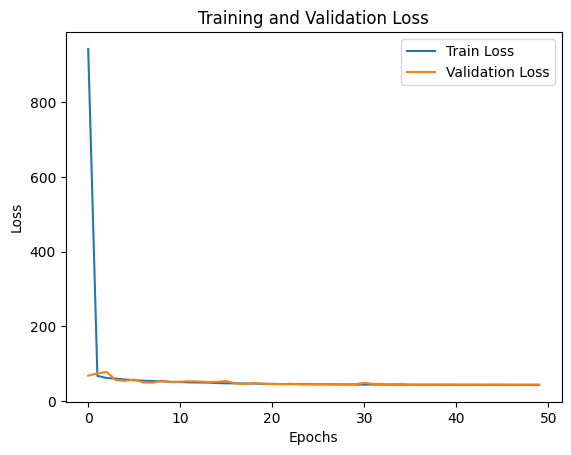

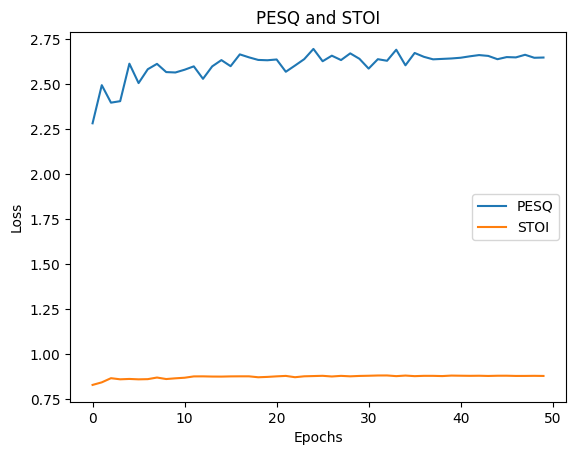

In [ ]:
#bluid train loop
from torch import nn
from train_unet import train
from model_2 import My_unet_2
model= My_unet_2(in_channels=1, out_channels=1)

loss= nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.1)
scheduler= torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.1)

nepochs= 50
batch_size= 1
save_dir= '/checkpoints_2'
os.makedirs(save_dir, exist_ok= True)
train_losses, val_losses, val_pesq_scores, val_stoi_scores= train(model, data_path='/data/train/', batch_size= batch_size, n_epochs= nepochs, transform=transform, save_dir=save_dir)

# Plot training and validation losses
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
plt.plot(val_pesq_scores, label='PESQ')
plt.plot(val_stoi_scores, label='STOI')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('PESQ and STOI')
plt.legend()
plt.show()

In [ ]:
from torch import nn
from test_unet import test
from model_2 import My_unet_2
model= My_unet_2(in_channels=1, out_channels=1)
#uber
nepochs= 5
batch_size= 1
save_dir= '/results_2'
os.makedirs(save_dir, exist_ok= True)
test(model, data_path='/data/test/',checkpoint_path='/checkpoints_2/checkpoint_ep_48.pth', batch_size= batch_size, transform=transform, save_dir=save_dir)

Loading the data...
Device: cuda


100%|██████████| 782/782 [05:10<00:00,  2.52it/s]


Test Loss: 42.3163, Average SNR: 3.5387, Average PESQ: 2.6786, Average STOI: 0.8811
saved result dict !


(42.31626730440828, 3.538666726709671, 2.678558842300454, 0.8811462860354378)

In [ ]:
import pickle
from data import retreive_sig
result_dict_path= '/results_2/result_dict.pickle'
data_path='/data/test/'

original signal


noisy signal


retreived signal


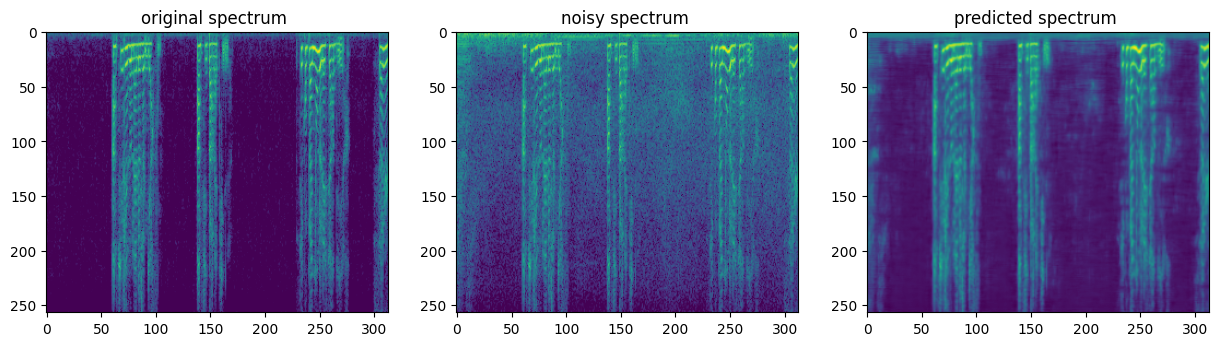

In [ ]:
import pickle
from data import retreive_sig
result_dict_path= '/results_2/result_dict.pickle'
data_path='/data/test/'
read_results(result_dict_path= result_dict_path, data_path= data_path)

#Third training



Loading the data...
Device: cuda

 start training


  0%|          | 0/50 [00:00<?, ?it/s]

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_0.pth


/content/Audio_denoising/train_unet.py:146: RuntimeWarning: overflow encountered in short_scalars
  signal_power = np.mean(np.square((original_signal- np.mean(original_signal))/(np.max(original_signal)- np.min(original_signal))))
/content/Audio_denoising/train_unet.py:147: RuntimeWarning: overflow encountered in short_scalars
  noise_power = np.mean(np.square((original_signal- np.mean(original_signal))/(np.max(original_signal)- np.min(original_signal)) - (predicted_sig- np.mean(predicted_sig))/(np.max(predicted_sig)- np.min(predicted_sig))))
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for

Epoch 1, Train Loss: 247.6353, Validation Loss: 61.7917, Average PESQ: 1.2679, Average STOI: 0.4779


  2%|▏         | 1/50 [03:27<2:49:06, 207.08s/it]

results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_1.pth


  4%|▍         | 2/50 [06:56<2:46:45, 208.45s/it]

Epoch 2, Train Loss: 63.8268, Validation Loss: 62.1244, Average PESQ: 1.2757, Average STOI: 0.4749
results saved ! 



  6%|▌         | 3/50 [10:26<2:43:42, 208.99s/it]

Epoch 3, Train Loss: 64.5934, Validation Loss: 62.0429, Average PESQ: 1.2763, Average STOI: 0.4757
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_3.pth


  8%|▊         | 4/50 [13:50<2:38:40, 206.97s/it]

Epoch 4, Train Loss: 61.9905, Validation Loss: 61.7169, Average PESQ: 1.2723, Average STOI: 0.4750
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_4.pth


 10%|█         | 5/50 [16:51<2:28:20, 197.79s/it]

Epoch 5, Train Loss: 45.4247, Validation Loss: 14.1562, Average PESQ: 1.4497, Average STOI: 0.4305
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_5.pth


 12%|█▏        | 6/50 [19:52<2:20:47, 191.99s/it]

Epoch 6, Train Loss: 12.4253, Validation Loss: 11.3510, Average PESQ: 1.1417, Average STOI: 0.4592
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_6.pth


 14%|█▍        | 7/50 [23:18<2:20:59, 196.72s/it]

Epoch 7, Train Loss: 11.4154, Validation Loss: 10.7459, Average PESQ: 1.1966, Average STOI: 0.4594
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_7.pth


 16%|█▌        | 8/50 [26:57<2:22:37, 203.75s/it]

Epoch 8, Train Loss: 9.0216, Validation Loss: 8.1574, Average PESQ: 1.2122, Average STOI: 0.4698
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_8.pth


 18%|█▊        | 9/50 [30:16<2:18:15, 202.33s/it]

Epoch 9, Train Loss: 7.9926, Validation Loss: 7.6696, Average PESQ: 1.2457, Average STOI: 0.5094
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_9.pth


 20%|██        | 10/50 [33:27<2:12:29, 198.75s/it]

Epoch 10, Train Loss: 7.6021, Validation Loss: 7.5222, Average PESQ: 1.2854, Average STOI: 0.5368
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_10.pth


 22%|██▏       | 11/50 [36:32<2:06:23, 194.45s/it]

Epoch 11, Train Loss: 7.3196, Validation Loss: 7.2352, Average PESQ: 1.3658, Average STOI: 0.5848
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_11.pth


 24%|██▍       | 12/50 [39:31<2:00:10, 189.74s/it]

Epoch 12, Train Loss: 6.9738, Validation Loss: 6.7263, Average PESQ: 1.5118, Average STOI: 0.6461
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_12.pth


 26%|██▌       | 13/50 [42:28<1:54:44, 186.06s/it]

Epoch 13, Train Loss: 6.5824, Validation Loss: 6.3834, Average PESQ: 1.6566, Average STOI: 0.6980
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_13.pth


 28%|██▊       | 14/50 [45:25<1:49:56, 183.22s/it]

Epoch 14, Train Loss: 6.3602, Validation Loss: 6.5032, Average PESQ: 1.7639, Average STOI: 0.7333
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_14.pth


 30%|███       | 15/50 [48:25<1:46:17, 182.21s/it]

Epoch 15, Train Loss: 6.0702, Validation Loss: 5.7671, Average PESQ: 1.9123, Average STOI: 0.7629
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_15.pth


 32%|███▏      | 16/50 [51:24<1:42:49, 181.46s/it]

Epoch 16, Train Loss: 5.8171, Validation Loss: 5.6417, Average PESQ: 1.9968, Average STOI: 0.7777
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_16.pth


 34%|███▍      | 17/50 [54:24<1:39:32, 180.98s/it]

Epoch 17, Train Loss: 5.5501, Validation Loss: 5.3714, Average PESQ: 2.0777, Average STOI: 0.7958
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_17.pth


 36%|███▌      | 18/50 [57:21<1:35:51, 179.72s/it]

Epoch 18, Train Loss: 5.4422, Validation Loss: 5.2299, Average PESQ: 2.1843, Average STOI: 0.8090
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_18.pth


 38%|███▊      | 19/50 [1:00:17<1:32:13, 178.51s/it]

Epoch 19, Train Loss: 5.2188, Validation Loss: 5.1261, Average PESQ: 2.2235, Average STOI: 0.8157
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_19.pth


 40%|████      | 20/50 [1:03:14<1:29:02, 178.07s/it]

Epoch 20, Train Loss: 5.1354, Validation Loss: 4.9812, Average PESQ: 2.2369, Average STOI: 0.8232
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_20.pth


 42%|████▏     | 21/50 [1:06:11<1:26:00, 177.94s/it]

Epoch 21, Train Loss: 5.0273, Validation Loss: 4.9172, Average PESQ: 2.2612, Average STOI: 0.8255
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_21.pth


 44%|████▍     | 22/50 [1:09:09<1:23:00, 177.87s/it]

Epoch 22, Train Loss: 4.9406, Validation Loss: 5.3374, Average PESQ: 2.2864, Average STOI: 0.8273
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_22.pth


 46%|████▌     | 23/50 [1:12:06<1:19:57, 177.68s/it]

Epoch 23, Train Loss: 4.9082, Validation Loss: 4.8066, Average PESQ: 2.3002, Average STOI: 0.8321
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_23.pth


 48%|████▊     | 24/50 [1:15:04<1:16:59, 177.68s/it]

Epoch 24, Train Loss: 4.8273, Validation Loss: 4.7874, Average PESQ: 2.3032, Average STOI: 0.8331
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_24.pth


 50%|█████     | 25/50 [1:18:02<1:14:00, 177.62s/it]

Epoch 25, Train Loss: 4.8202, Validation Loss: 4.7783, Average PESQ: 2.2957, Average STOI: 0.8368
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_25.pth


 52%|█████▏    | 26/50 [1:20:59<1:11:00, 177.54s/it]

Epoch 26, Train Loss: 4.7630, Validation Loss: 4.7114, Average PESQ: 2.3270, Average STOI: 0.8368
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_26.pth


 54%|█████▍    | 27/50 [1:23:57<1:08:04, 177.58s/it]

Epoch 27, Train Loss: 4.7286, Validation Loss: 4.7164, Average PESQ: 2.3167, Average STOI: 0.8375
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_27.pth


 56%|█████▌    | 28/50 [1:26:55<1:05:11, 177.78s/it]

Epoch 28, Train Loss: 4.7040, Validation Loss: 4.6896, Average PESQ: 2.3466, Average STOI: 0.8382
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_28.pth


 58%|█████▊    | 29/50 [1:29:50<1:01:58, 177.09s/it]

Epoch 29, Train Loss: 4.6974, Validation Loss: 4.7065, Average PESQ: 2.3238, Average STOI: 0.8409
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_29.pth


 60%|██████    | 30/50 [1:32:47<58:58, 176.93s/it]  

Epoch 30, Train Loss: 4.6700, Validation Loss: 4.6111, Average PESQ: 2.3548, Average STOI: 0.8415
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_30.pth


 62%|██████▏   | 31/50 [1:35:43<55:59, 176.80s/it]

Epoch 31, Train Loss: 4.6386, Validation Loss: 4.6288, Average PESQ: 2.3454, Average STOI: 0.8419
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_31.pth


 64%|██████▍   | 32/50 [1:38:39<52:55, 176.40s/it]

Epoch 32, Train Loss: 4.6207, Validation Loss: 4.5860, Average PESQ: 2.3506, Average STOI: 0.8434
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_32.pth


 66%|██████▌   | 33/50 [1:41:36<50:00, 176.50s/it]

Epoch 33, Train Loss: 4.6047, Validation Loss: 4.6232, Average PESQ: 2.3588, Average STOI: 0.8418
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_33.pth


 68%|██████▊   | 34/50 [1:44:31<47:00, 176.30s/it]

Epoch 34, Train Loss: 4.5881, Validation Loss: 4.5751, Average PESQ: 2.3583, Average STOI: 0.8443
results saved ! 



 70%|███████   | 35/50 [1:47:26<43:56, 175.80s/it]

Epoch 35, Train Loss: 4.5937, Validation Loss: 4.5743, Average PESQ: 2.3687, Average STOI: 0.8431
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_35.pth


 72%|███████▏  | 36/50 [1:50:22<41:02, 175.91s/it]

Epoch 36, Train Loss: 4.5656, Validation Loss: 4.5374, Average PESQ: 2.3678, Average STOI: 0.8448
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_36.pth


 74%|███████▍  | 37/50 [1:53:20<38:13, 176.45s/it]

Epoch 37, Train Loss: 4.5582, Validation Loss: 4.5619, Average PESQ: 2.3630, Average STOI: 0.8449
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_37.pth


 76%|███████▌  | 38/50 [1:56:18<35:21, 176.81s/it]

Epoch 38, Train Loss: 4.5495, Validation Loss: 4.5181, Average PESQ: 2.3764, Average STOI: 0.8456
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_38.pth


 78%|███████▊  | 39/50 [1:59:15<32:26, 176.93s/it]

Epoch 39, Train Loss: 4.5416, Validation Loss: 4.5345, Average PESQ: 2.3674, Average STOI: 0.8451
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_39.pth


 80%|████████  | 40/50 [2:02:12<29:29, 176.96s/it]

Epoch 40, Train Loss: 4.5379, Validation Loss: 4.5405, Average PESQ: 2.3756, Average STOI: 0.8450
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_40.pth


 82%|████████▏ | 41/50 [2:05:09<26:32, 176.90s/it]

Epoch 41, Train Loss: 4.5330, Validation Loss: 4.5607, Average PESQ: 2.3842, Average STOI: 0.8452
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_41.pth


 84%|████████▍ | 42/50 [2:08:06<23:35, 176.97s/it]

Epoch 42, Train Loss: 4.5306, Validation Loss: 4.5256, Average PESQ: 2.3810, Average STOI: 0.8457
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_42.pth


 86%|████████▌ | 43/50 [2:11:03<20:38, 176.99s/it]

Epoch 43, Train Loss: 4.5205, Validation Loss: 4.5213, Average PESQ: 2.3738, Average STOI: 0.8455
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_43.pth


 88%|████████▊ | 44/50 [2:14:00<17:42, 177.02s/it]

Epoch 44, Train Loss: 4.5109, Validation Loss: 4.4968, Average PESQ: 2.3841, Average STOI: 0.8473
results saved ! 



 90%|█████████ | 45/50 [2:16:56<14:43, 176.72s/it]

Epoch 45, Train Loss: 4.5111, Validation Loss: 4.5207, Average PESQ: 2.3749, Average STOI: 0.8461
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_45.pth


 92%|█████████▏| 46/50 [2:19:53<11:47, 176.94s/it]

Epoch 46, Train Loss: 4.5031, Validation Loss: 4.5165, Average PESQ: 2.3762, Average STOI: 0.8454
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_46.pth


 94%|█████████▍| 47/50 [2:22:51<08:51, 177.23s/it]

Epoch 47, Train Loss: 4.5016, Validation Loss: 4.5022, Average PESQ: 2.3836, Average STOI: 0.8458
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_47.pth


 96%|█████████▌| 48/50 [2:25:49<05:54, 177.48s/it]

Epoch 48, Train Loss: 4.4967, Validation Loss: 4.4901, Average PESQ: 2.3800, Average STOI: 0.8470
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint_ep_48.pth


 98%|█████████▊| 49/50 [2:28:48<02:57, 177.72s/it]

Epoch 49, Train Loss: 4.4921, Validation Loss: 4.4893, Average PESQ: 2.3856, Average STOI: 0.8469
results saved ! 



100%|██████████| 50/50 [2:31:44<00:00, 182.10s/it]

Epoch 50, Train Loss: 4.4932, Validation Loss: 4.4930, Average PESQ: 2.3848, Average STOI: 0.8467
results saved ! 



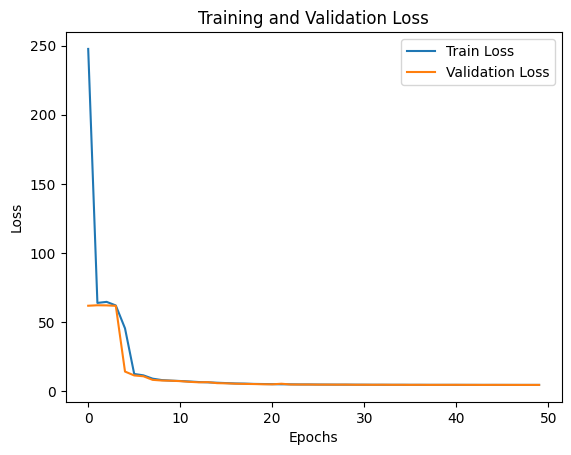

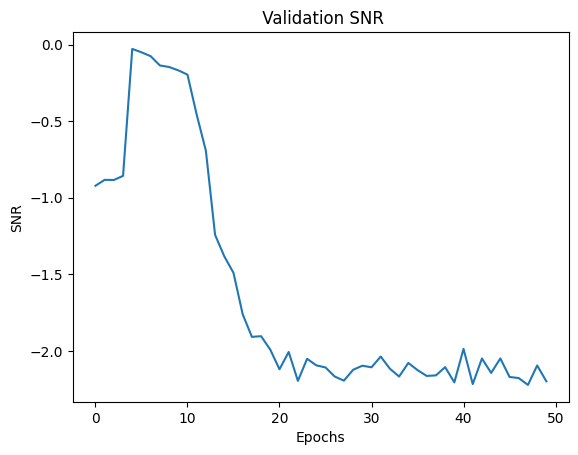

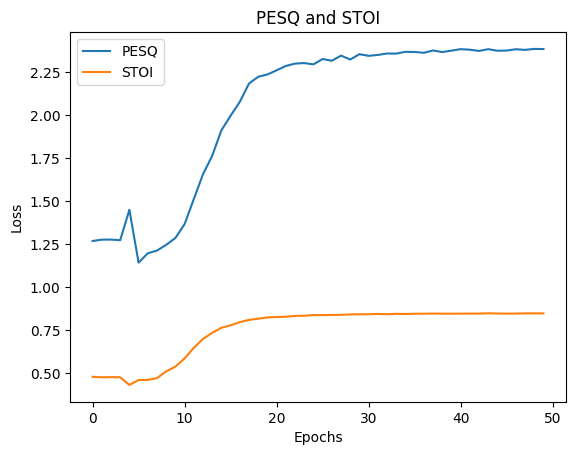

In [ ]:
#bluid train loop
from torch import nn
from train_unet import train
from model import My_unet
model= My_unet(in_channels=1, out_channels=1)

loss= nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.1)
scheduler= torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.1)

nepochs= 50
batch_size= 1
save_dir= '/checkpoints_3'
os.makedirs(save_dir, exist_ok= True)
train_losses, val_losses, snr_values, val_pesq_scores, val_stoi_scores= train(model, data_path='/data/train/', batch_size= 32, n_epochs= nepochs, transform=transform, save_dir=save_dir)

# Plot training and validation losses
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.plot(snr_values, label='SNR values')
plt.xlabel('Epochs')
plt.ylabel('SNR')
plt.title(' Validation SNR')
plt.show()


plt.plot(val_pesq_scores, label='PESQ')
plt.plot(val_stoi_scores, label='STOI')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('PESQ and STOI')
plt.legend()
plt.show()

In [ ]:
from torch import nn
from test_unet import test
from model import My_unet
model= My_unet(in_channels=1, out_channels=1)
#uber
nepochs= 5
batch_size= 1
save_dir= '/results_3'
os.makedirs(save_dir, exist_ok= True)
test(model, data_path='data/data/test/',checkpoint_path='/checkpoint_ep_48.pth', batch_size= batch_size, transform=transform, save_dir=save_dir)

Loading the data...
Device: cuda


  0%|          | 0/782 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
  0%|          | 1/782 [00:00<03:22,  3.86it/s]/content/Audio_denoising/train_unet.py:146: RuntimeWarning: overflow encountered in short_scalars
  signal_power = np.mean(np.square((original_signal- np.mean(original_signal))/(np.max(original_signa

Test Loss: 44.2034, Average SNR: 2.4285, Average PESQ: 2.3971, Average STOI: 0.8487
saved result dict !


(44.20344211134459, 2.4284901293840795, 2.3971127808246466, 0.8486914386987077)

original signal


noisy signal


retreived signal


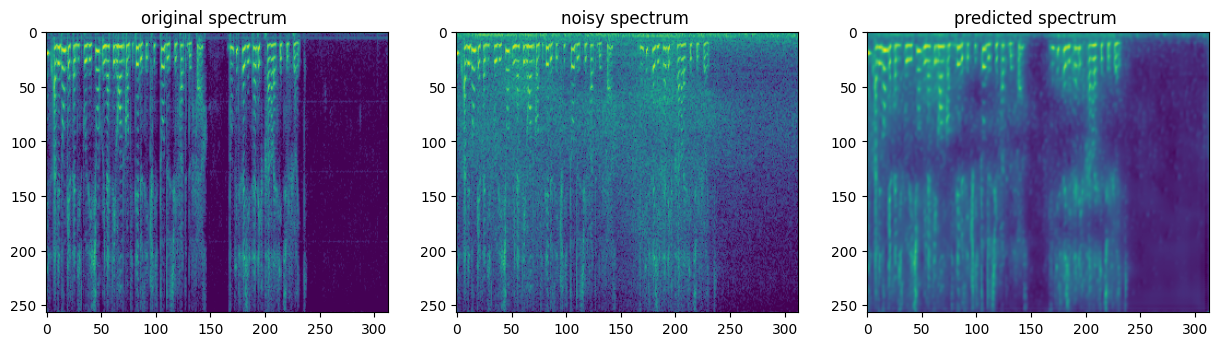

In [ ]:
import pickle
from data import retreive_sig
result_dict_path= '/results_3/result_dict.pickle'
data_path='/data/test/'

read_results(result_dict_path= result_dict_path, data_path= data_path)

##THIRD TRAIN bis

Loading the data...
Device: cuda

 start training


  0%|          | 0/70 [00:00<?, ?it/s]

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/content/Audio_denoising/train_unet.py:146: RuntimeWarning: overflow encountered in short_scalars
  signal_power = np.mean(np.square((original_signal- np.mean(original_signal))/(np.max(original_signal)- np.min(original_signal))))
/content/Audio_denoising/train_unet.py:147: RuntimeWarn

Epoch 1, Train Loss: 12.6490, Validation Loss: 6.6887, Validation SNR: -2.1821, Average PESQ: 2.2960, Average STOI: 0.8568


  1%|▏         | 1/70 [03:42<4:15:45, 222.39s/it]

results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


  3%|▎         | 2/70 [07:02<3:56:59, 209.11s/it]

Epoch 2, Train Loss: 6.7548, Validation Loss: 5.8298, Validation SNR: -3.4141, Average PESQ: 2.5067, Average STOI: 0.8729
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


  4%|▍         | 3/70 [10:23<3:49:16, 205.33s/it]

Epoch 3, Train Loss: 5.8620, Validation Loss: 5.6371, Validation SNR: -3.6001, Average PESQ: 2.4507, Average STOI: 0.8768
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


  6%|▌         | 4/70 [13:44<3:44:06, 203.73s/it]

Epoch 4, Train Loss: 4.9884, Validation Loss: 4.1874, Validation SNR: -3.6918, Average PESQ: 2.4723, Average STOI: 0.8767
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


  7%|▋         | 5/70 [17:06<3:39:59, 203.07s/it]

Epoch 5, Train Loss: 4.3913, Validation Loss: 3.9002, Validation SNR: -3.7325, Average PESQ: 2.5147, Average STOI: 0.8802
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


  9%|▊         | 6/70 [20:27<3:36:01, 202.52s/it]

Epoch 6, Train Loss: 3.8806, Validation Loss: 3.8203, Validation SNR: -3.5009, Average PESQ: 2.5918, Average STOI: 0.8830
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 10%|█         | 7/70 [23:49<3:32:18, 202.19s/it]

Epoch 7, Train Loss: 3.7565, Validation Loss: 3.4834, Validation SNR: -4.0263, Average PESQ: 2.6115, Average STOI: 0.8859
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 11%|█▏        | 8/70 [27:11<3:28:50, 202.11s/it]

Epoch 8, Train Loss: 3.5413, Validation Loss: 3.4074, Validation SNR: -3.4259, Average PESQ: 2.6518, Average STOI: 0.8844
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 13%|█▎        | 9/70 [30:33<3:25:37, 202.25s/it]

Epoch 9, Train Loss: 3.4209, Validation Loss: 3.4077, Validation SNR: -3.9470, Average PESQ: 2.5426, Average STOI: 0.8895
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 14%|█▍        | 10/70 [33:55<3:21:59, 202.00s/it]

Epoch 10, Train Loss: 3.3757, Validation Loss: 3.5843, Validation SNR: -3.7133, Average PESQ: 2.5068, Average STOI: 0.8921
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 16%|█▌        | 11/70 [37:16<3:18:25, 201.80s/it]

Epoch 11, Train Loss: 3.2827, Validation Loss: 3.1358, Validation SNR: -3.8759, Average PESQ: 2.5948, Average STOI: 0.8881
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 17%|█▋        | 12/70 [40:38<3:15:03, 201.79s/it]

Epoch 12, Train Loss: 3.2084, Validation Loss: 3.1749, Validation SNR: -3.5334, Average PESQ: 2.6281, Average STOI: 0.8849
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 19%|█▊        | 13/70 [44:00<3:11:47, 201.88s/it]

Epoch 13, Train Loss: 3.1280, Validation Loss: 3.0417, Validation SNR: -3.6237, Average PESQ: 2.6105, Average STOI: 0.8873
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 20%|██        | 14/70 [47:20<3:07:58, 201.41s/it]

Epoch 14, Train Loss: 3.0325, Validation Loss: 3.0353, Validation SNR: -3.5966, Average PESQ: 2.6242, Average STOI: 0.8869
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 21%|██▏       | 15/70 [50:42<3:04:47, 201.59s/it]

Epoch 15, Train Loss: 2.9574, Validation Loss: 3.0318, Validation SNR: -3.9566, Average PESQ: 2.6119, Average STOI: 0.8879
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 23%|██▎       | 16/70 [54:04<3:01:22, 201.53s/it]

Epoch 16, Train Loss: 2.9074, Validation Loss: 3.0316, Validation SNR: -3.3551, Average PESQ: 2.6161, Average STOI: 0.8900
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 24%|██▍       | 17/70 [57:26<2:58:09, 201.69s/it]

Epoch 17, Train Loss: 2.8630, Validation Loss: 2.9663, Validation SNR: -3.6134, Average PESQ: 2.6036, Average STOI: 0.8895
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 26%|██▌       | 18/70 [1:00:47<2:54:47, 201.67s/it]

Epoch 18, Train Loss: 2.8280, Validation Loss: 2.9561, Validation SNR: -3.3554, Average PESQ: 2.6376, Average STOI: 0.8908
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 27%|██▋       | 19/70 [1:04:08<2:51:04, 201.27s/it]

Epoch 19, Train Loss: 2.7890, Validation Loss: 2.9315, Validation SNR: -3.3513, Average PESQ: 2.6353, Average STOI: 0.8907
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 29%|██▊       | 20/70 [1:07:29<2:47:50, 201.42s/it]

Epoch 20, Train Loss: 2.7504, Validation Loss: 3.0270, Validation SNR: -3.6758, Average PESQ: 2.6001, Average STOI: 0.8947
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 30%|███       | 21/70 [1:10:51<2:44:28, 201.39s/it]

Epoch 21, Train Loss: 2.7196, Validation Loss: 2.9152, Validation SNR: -3.6805, Average PESQ: 2.6066, Average STOI: 0.8912
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 31%|███▏      | 22/70 [1:14:13<2:41:24, 201.76s/it]

Epoch 22, Train Loss: 2.7003, Validation Loss: 2.8982, Validation SNR: -3.3570, Average PESQ: 2.6457, Average STOI: 0.8913
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 33%|███▎      | 23/70 [1:17:34<2:37:49, 201.48s/it]

Epoch 23, Train Loss: 2.6635, Validation Loss: 3.0411, Validation SNR: -3.3593, Average PESQ: 2.6165, Average STOI: 0.8903
results saved ! 



 34%|███▍      | 24/70 [1:20:55<2:34:16, 201.22s/it]

Epoch 24, Train Loss: 2.6675, Validation Loss: 2.9188, Validation SNR: -3.6742, Average PESQ: 2.6159, Average STOI: 0.8908
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 36%|███▌      | 25/70 [1:24:16<2:30:51, 201.15s/it]

Epoch 25, Train Loss: 2.6249, Validation Loss: 2.8923, Validation SNR: -3.6481, Average PESQ: 2.6344, Average STOI: 0.8931
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 37%|███▋      | 26/70 [1:27:37<2:27:27, 201.08s/it]

Epoch 26, Train Loss: 2.6095, Validation Loss: 2.8955, Validation SNR: -3.8770, Average PESQ: 2.6389, Average STOI: 0.8907
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 39%|███▊      | 27/70 [1:30:57<2:23:57, 200.87s/it]

Epoch 27, Train Loss: 2.5964, Validation Loss: 2.9156, Validation SNR: -3.2948, Average PESQ: 2.6073, Average STOI: 0.8918
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 40%|████      | 28/70 [1:34:18<2:20:41, 200.99s/it]

Epoch 28, Train Loss: 2.5869, Validation Loss: 2.9647, Validation SNR: -3.7231, Average PESQ: 2.6016, Average STOI: 0.8907
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 41%|████▏     | 29/70 [1:37:40<2:17:31, 201.24s/it]

Epoch 29, Train Loss: 2.5714, Validation Loss: 2.8832, Validation SNR: -3.5531, Average PESQ: 2.6333, Average STOI: 0.8916
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 43%|████▎     | 30/70 [1:41:02<2:14:19, 201.48s/it]

Epoch 30, Train Loss: 2.5547, Validation Loss: 2.8826, Validation SNR: -3.9499, Average PESQ: 2.6449, Average STOI: 0.8928
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 44%|████▍     | 31/70 [1:44:24<2:11:02, 201.60s/it]

Epoch 31, Train Loss: 2.5483, Validation Loss: 2.8900, Validation SNR: -3.6776, Average PESQ: 2.6321, Average STOI: 0.8912
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 46%|████▌     | 32/70 [1:47:45<2:07:30, 201.33s/it]

Epoch 32, Train Loss: 2.5385, Validation Loss: 2.8856, Validation SNR: -3.7841, Average PESQ: 2.6461, Average STOI: 0.8915
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 47%|████▋     | 33/70 [1:51:05<2:03:59, 201.07s/it]

Epoch 33, Train Loss: 2.5319, Validation Loss: 2.8687, Validation SNR: -3.6421, Average PESQ: 2.6449, Average STOI: 0.8924
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 49%|████▊     | 34/70 [1:54:27<2:00:44, 201.23s/it]

Epoch 34, Train Loss: 2.5218, Validation Loss: 2.8826, Validation SNR: -3.6512, Average PESQ: 2.6286, Average STOI: 0.8921
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 50%|█████     | 35/70 [1:57:49<1:57:28, 201.39s/it]

Epoch 35, Train Loss: 2.5144, Validation Loss: 2.8757, Validation SNR: -3.6405, Average PESQ: 2.6366, Average STOI: 0.8924
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 51%|█████▏    | 36/70 [2:01:10<1:54:08, 201.43s/it]

Epoch 36, Train Loss: 2.5069, Validation Loss: 2.8854, Validation SNR: -3.0659, Average PESQ: 2.6307, Average STOI: 0.8917
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 53%|█████▎    | 37/70 [2:04:31<1:50:44, 201.34s/it]

Epoch 37, Train Loss: 2.5041, Validation Loss: 2.8734, Validation SNR: -3.8557, Average PESQ: 2.6336, Average STOI: 0.8914
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 54%|█████▍    | 38/70 [2:07:51<1:47:06, 200.82s/it]

Epoch 38, Train Loss: 2.4967, Validation Loss: 2.8792, Validation SNR: -3.6159, Average PESQ: 2.6252, Average STOI: 0.8920
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 56%|█████▌    | 39/70 [2:11:11<1:43:39, 200.63s/it]

Epoch 39, Train Loss: 2.4934, Validation Loss: 2.9120, Validation SNR: -3.4073, Average PESQ: 2.6222, Average STOI: 0.8894
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 57%|█████▋    | 40/70 [2:14:32<1:40:20, 200.69s/it]

Epoch 40, Train Loss: 2.4901, Validation Loss: 2.9135, Validation SNR: -3.6888, Average PESQ: 2.6287, Average STOI: 0.8904
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 59%|█████▊    | 41/70 [2:17:53<1:37:04, 200.83s/it]

Epoch 41, Train Loss: 2.4832, Validation Loss: 2.8735, Validation SNR: -3.8878, Average PESQ: 2.6266, Average STOI: 0.8922
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 60%|██████    | 42/70 [2:21:14<1:33:48, 201.01s/it]

Epoch 42, Train Loss: 2.4799, Validation Loss: 2.8818, Validation SNR: -3.3425, Average PESQ: 2.6359, Average STOI: 0.8920
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 61%|██████▏   | 43/70 [2:24:35<1:30:25, 200.95s/it]

Epoch 43, Train Loss: 2.4761, Validation Loss: 2.8751, Validation SNR: -3.4384, Average PESQ: 2.6384, Average STOI: 0.8920
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 63%|██████▎   | 44/70 [2:27:56<1:27:03, 200.91s/it]

Epoch 44, Train Loss: 2.4759, Validation Loss: 2.8992, Validation SNR: -3.3730, Average PESQ: 2.6205, Average STOI: 0.8911
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 64%|██████▍   | 45/70 [2:31:17<1:23:43, 200.95s/it]

Epoch 45, Train Loss: 2.4720, Validation Loss: 2.8705, Validation SNR: -3.9350, Average PESQ: 2.6396, Average STOI: 0.8920
results saved ! 



 66%|██████▌   | 46/70 [2:34:37<1:20:12, 200.50s/it]

Epoch 46, Train Loss: 2.4723, Validation Loss: 2.8865, Validation SNR: -3.5653, Average PESQ: 2.6261, Average STOI: 0.8919
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 67%|██████▋   | 47/70 [2:37:57<1:16:54, 200.63s/it]

Epoch 47, Train Loss: 2.4691, Validation Loss: 2.8927, Validation SNR: -3.9117, Average PESQ: 2.6254, Average STOI: 0.8919
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 69%|██████▊   | 48/70 [2:41:18<1:13:33, 200.61s/it]

Epoch 48, Train Loss: 2.4671, Validation Loss: 2.8830, Validation SNR: -3.0886, Average PESQ: 2.6288, Average STOI: 0.8909
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 70%|███████   | 49/70 [2:44:38<1:10:09, 200.45s/it]

Epoch 49, Train Loss: 2.4642, Validation Loss: 2.8809, Validation SNR: -3.9892, Average PESQ: 2.6236, Average STOI: 0.8918
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 71%|███████▏  | 50/70 [2:47:59<1:06:51, 200.58s/it]

Epoch 50, Train Loss: 2.4608, Validation Loss: 2.8719, Validation SNR: -3.6779, Average PESQ: 2.6338, Average STOI: 0.8918
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 73%|███████▎  | 51/70 [2:51:21<1:03:39, 201.02s/it]

Epoch 51, Train Loss: 2.4606, Validation Loss: 2.9078, Validation SNR: -3.3737, Average PESQ: 2.6229, Average STOI: 0.8910
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 74%|███████▍  | 52/70 [2:54:43<1:00:25, 201.41s/it]

Epoch 52, Train Loss: 2.4578, Validation Loss: 2.8664, Validation SNR: -3.6660, Average PESQ: 2.6309, Average STOI: 0.8924
results saved ! 



 76%|███████▌  | 53/70 [2:58:03<56:55, 200.91s/it]  

Epoch 53, Train Loss: 2.4600, Validation Loss: 2.8830, Validation SNR: -3.2155, Average PESQ: 2.6217, Average STOI: 0.8914
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 77%|███████▋  | 54/70 [3:01:24<53:34, 200.93s/it]

Epoch 54, Train Loss: 2.4560, Validation Loss: 2.8860, Validation SNR: -3.5464, Average PESQ: 2.6240, Average STOI: 0.8915
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 79%|███████▊  | 55/70 [3:04:45<50:14, 200.95s/it]

Epoch 55, Train Loss: 2.4560, Validation Loss: 2.8943, Validation SNR: -3.6671, Average PESQ: 2.6292, Average STOI: 0.8908
results saved ! 



 80%|████████  | 56/70 [3:08:05<46:50, 200.77s/it]

Epoch 56, Train Loss: 2.4560, Validation Loss: 2.9041, Validation SNR: -3.6949, Average PESQ: 2.6223, Average STOI: 0.8896
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 81%|████████▏ | 57/70 [3:11:28<43:35, 201.20s/it]

Epoch 57, Train Loss: 2.4550, Validation Loss: 2.9032, Validation SNR: -3.6522, Average PESQ: 2.6232, Average STOI: 0.8909
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 83%|████████▎ | 58/70 [3:14:48<40:12, 201.01s/it]

Epoch 58, Train Loss: 2.4545, Validation Loss: 2.8812, Validation SNR: -3.6902, Average PESQ: 2.6315, Average STOI: 0.8919
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 84%|████████▍ | 59/70 [3:18:09<36:51, 201.01s/it]

Epoch 59, Train Loss: 2.4532, Validation Loss: 2.8908, Validation SNR: -3.6049, Average PESQ: 2.6251, Average STOI: 0.8912
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 86%|████████▌ | 60/70 [3:21:30<33:29, 200.97s/it]

Epoch 60, Train Loss: 2.4520, Validation Loss: 2.8715, Validation SNR: -3.5869, Average PESQ: 2.6405, Average STOI: 0.8925
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 87%|████████▋ | 61/70 [3:24:51<30:07, 200.82s/it]

Epoch 61, Train Loss: 2.4504, Validation Loss: 2.8904, Validation SNR: -4.0114, Average PESQ: 2.6208, Average STOI: 0.8908
results saved ! 



 89%|████████▊ | 62/70 [3:28:11<26:46, 200.84s/it]

Epoch 62, Train Loss: 2.4516, Validation Loss: 2.8834, Validation SNR: -3.1642, Average PESQ: 2.6311, Average STOI: 0.8919
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 90%|█████████ | 63/70 [3:31:33<23:26, 200.92s/it]

Epoch 63, Train Loss: 2.4490, Validation Loss: 2.8917, Validation SNR: -3.6492, Average PESQ: 2.6331, Average STOI: 0.8914
results saved ! 



 91%|█████████▏| 64/70 [3:34:54<20:05, 200.97s/it]

Epoch 64, Train Loss: 2.4495, Validation Loss: 2.8823, Validation SNR: -3.6864, Average PESQ: 2.6275, Average STOI: 0.8916
results saved ! 



 93%|█████████▎| 65/70 [3:38:13<16:42, 200.54s/it]

Epoch 65, Train Loss: 2.4514, Validation Loss: 2.8830, Validation SNR: -3.8646, Average PESQ: 2.6323, Average STOI: 0.8914
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 94%|█████████▍| 66/70 [3:41:35<13:23, 200.85s/it]

Epoch 66, Train Loss: 2.4483, Validation Loss: 2.8657, Validation SNR: -3.6540, Average PESQ: 2.6376, Average STOI: 0.8923
results saved ! 



 96%|█████████▌| 67/70 [3:44:55<10:01, 200.61s/it]

Epoch 67, Train Loss: 2.4490, Validation Loss: 2.8928, Validation SNR: -3.6929, Average PESQ: 2.6248, Average STOI: 0.8916
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 97%|█████████▋| 68/70 [3:48:15<06:41, 200.61s/it]

Epoch 68, Train Loss: 2.4478, Validation Loss: 2.9107, Validation SNR: -3.8762, Average PESQ: 2.6233, Average STOI: 0.8893
results saved ! 

checkpoint saved at:  /content/drive/MyDrive/Dlts_project/checkpoints_3/checkpoint.pth


 99%|█████████▊| 69/70 [3:51:37<03:20, 200.88s/it]

Epoch 69, Train Loss: 2.4476, Validation Loss: 2.8920, Validation SNR: -3.5544, Average PESQ: 2.6254, Average STOI: 0.8916
results saved ! 



100%|██████████| 70/70 [3:54:57<00:00, 201.40s/it]

Epoch 70, Train Loss: 2.4480, Validation Loss: 2.8711, Validation SNR: -3.6127, Average PESQ: 2.6339, Average STOI: 0.8920
results saved ! 



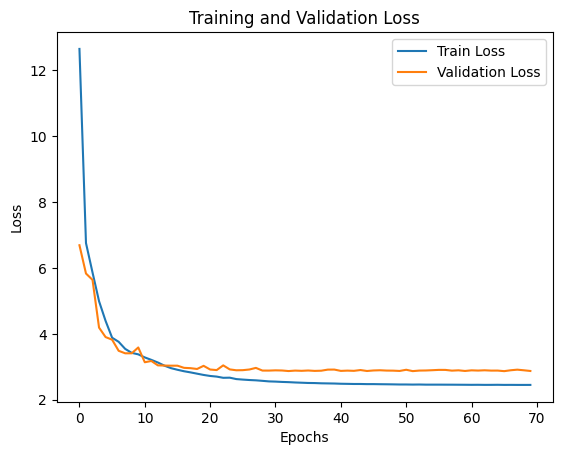

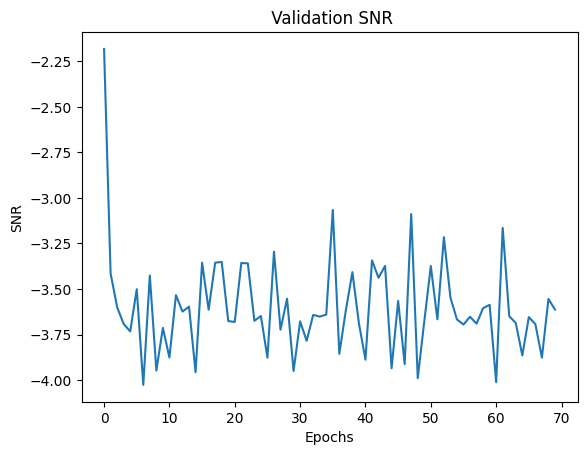

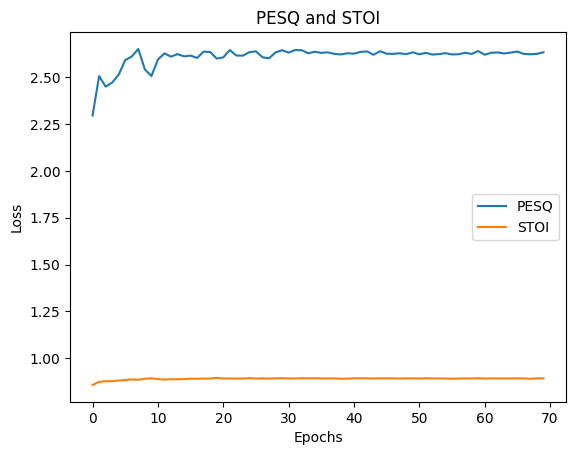

In [ ]:
#bluid train loop
from torch import nn
from train_unet import train
from model import My_unet

model= My_unet(in_channels=1, out_channels=1)
checkpoint= torch.load('/checkpoints_3/checkpoint_ep_48.pth')
model.load_state_dict(checkpoint)

loss= nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.1)
scheduler= torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.1)

nepochs= 70
batch_size= 1
save_dir= '/checkpoints_3'
os.makedirs(save_dir, exist_ok= True)
train_losses, val_losses, snr_values, val_pesq_scores, val_stoi_scores= train(model, data_path='/data/train/', batch_size= 8, n_epochs= nepochs, transform=transform, save_dir=save_dir)

# Plot training and validation losses
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.plot(snr_values, label='SNR values')
plt.xlabel('Epochs')
plt.ylabel('SNR')
plt.title(' Validation SNR')
plt.show()


plt.plot(val_pesq_scores, label='PESQ')
plt.plot(val_stoi_scores, label='STOI')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('PESQ and STOI')
plt.legend()
plt.show()